In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sn

In [4]:
data=pd.read_csv("churn.csv")

In [5]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.drop("customerID",axis=1,inplace=True)

In [7]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data["TotalCharges"].dtypes

dtype('O')

In [9]:
pd.to_numeric(data["TotalCharges"],errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
data[pd.to_numeric(data["TotalCharges"],errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
data1=data[data["TotalCharges"]!=" "]
data1.shape

(7032, 20)

In [12]:
data1["TotalCharges"]=pd.to_numeric(data1["TotalCharges"])

<ipython-input-12-48c4772f9677>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["TotalCharges"]=pd.to_numeric(data1["TotalCharges"])


In [13]:
data1["TotalCharges"].dtypes

dtype('float64')

In [14]:
tenur_no=data1[data1["Churn"]=="No"]["tenure"]
tenur_yes=data1[data1["Churn"]=="Yes"]["tenure"]

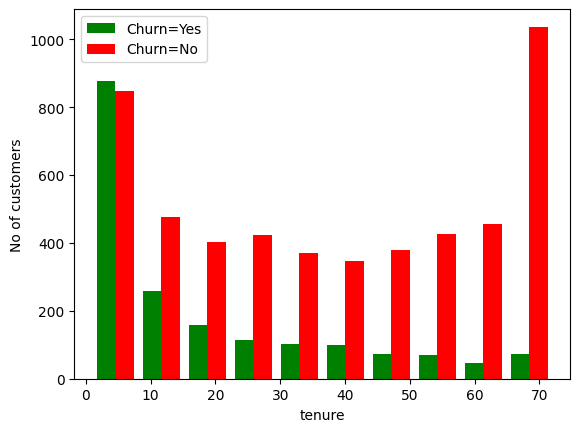

In [15]:
pl.hist([tenur_yes,tenur_no],color=["green","red"],label=["Churn=Yes","Churn=No"])
pl.xlabel("tenure")
pl.ylabel("No of customers")
pl.legend()

In [16]:
def unique_val(data_set):
  for col in data_set:
    if data_set[col].dtype=="object":
      print(f"{col} = {data_set[col].unique()}")

In [17]:
unique_val(data1)

gender = ['Female' 'Male']
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
MultipleLines = ['No phone service' 'No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes' 'No internet service']
OnlineBackup = ['Yes' 'No' 'No internet service']
DeviceProtection = ['No' 'Yes' 'No internet service']
TechSupport = ['No' 'Yes' 'No internet service']
StreamingTV = ['No' 'Yes' 'No internet service']
StreamingMovies = ['No' 'Yes' 'No internet service']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn = ['No' 'Yes']


In [18]:
data1.replace({"No internet service":"No","No phone service":"No"},inplace=True)

<ipython-input-18-f83ba900ae1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace({"No internet service":"No","No phone service":"No"},inplace=True)


In [19]:
unique_val(data1)

gender = ['Female' 'Male']
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
MultipleLines = ['No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes']
OnlineBackup = ['Yes' 'No']
DeviceProtection = ['No' 'Yes']
TechSupport = ['No' 'Yes']
StreamingTV = ['No' 'Yes']
StreamingMovies = ['No' 'Yes']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn = ['No' 'Yes']


In [20]:
yes_no_col=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]
def replace_yn(data_set):
  for i in yes_no_col:
    data_set[i].replace({"Yes":1,"No":0},inplace=True)

In [21]:
replace_yn(data1)

<ipython-input-20-79841d32a617>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set[i].replace({"Yes":1,"No":0},inplace=True)


In [22]:
unique_val(data1)

gender = ['Female' 'Male']
InternetService = ['DSL' 'Fiber optic' 'No']
Contract = ['Month-to-month' 'One year' 'Two year']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [23]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [24]:
data2=pd.get_dummies(data=data1,columns=["InternetService","Contract","PaymentMethod"])
data2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [25]:
data2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
743,Female,0,1,1,61,1,1,0,0,0,...,False,False,True,False,False,True,False,False,False,True
1260,Male,0,0,0,2,1,0,0,1,0,...,True,False,False,True,False,False,False,False,False,True
1255,Female,0,0,0,2,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
5973,Male,0,0,0,64,1,1,0,1,1,...,False,True,False,False,False,True,True,False,False,False


In [27]:
data2.shape

(7032, 27)

In [28]:
data2.dtypes

gender                                      object
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
minmax=MinMaxScaler()
col_stand=["tenure","TotalCharges","MonthlyCharges"]


In [33]:
data2[col_stand]=minmax.fit_transform(data2[col_stand])

In [34]:
data2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
280,Female,0,0,0,0.070423,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
2447,Male,0,0,0,0.084507,1,0,0,0,1,...,False,True,False,True,False,False,False,False,True,False


In [35]:
data2.replace({True:1,False:0},inplace=True)

In [36]:
data2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4801,Female,0,1,1,1.000000,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
3201,Female,0,0,0,0.690141,1,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
4159,Female,1,0,0,0.816901,1,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
8,Female,0,1,0,0.380282,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5878,Male,0,0,0,0.028169,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [47]:
x=data2.drop(["Churn","gender"],axis=1)
y=data2["Churn"]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)

In [50]:
import tensorflow as tf
from tensorflow import keras

In [53]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(25,),activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [56]:
model.fit(xtrain,ytrain,epochs=20)

Epoch 1/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8112
Epoch 2/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8133
Epoch 3/20
176/176 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8132
Epoch 4/20
176/176 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8167
Epoch 5/20
176/176 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8142
Epoch 6/20
176/176 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8158
Epoch 7/20
176/176 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8151
Epoch 8/20
176/176 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8155
Epoch 9/20
176/176 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8151
Epoch 10/20
176/176 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.8165

In [57]:
model.evaluate(xtest,ytest)

44/44 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.7932


[0.4390770196914673, 0.7931769490242004]

In [58]:
ypred=model.predict(xtest)

44/44 [==============================] - 1s 6ms/step


In [59]:
ypred

array([[0.00666265],
       [0.09319755],
       [0.7801137 ],
       ...,
       [0.05099214],
       [0.35859683],
       [0.00358822]], dtype=float32)

In [61]:
ypred2=[]
for i in ypred:
  if i > 0.5:
    ypred2.append(1)
  else:
    ypred2.append(0)

In [64]:
ypred2[:5]

[0, 0, 1, 0, 1]

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

In [66]:
cl=classification_report(ypred2,ytest)
cm=confusion_matrix(ypred2,ytest)

In [68]:
print(cl)

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1096
           1       0.53      0.63      0.58       311

    accuracy                           0.79      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.81      0.79      0.80      1407



Text(50.722222222222214, 0.5, 'Actual')

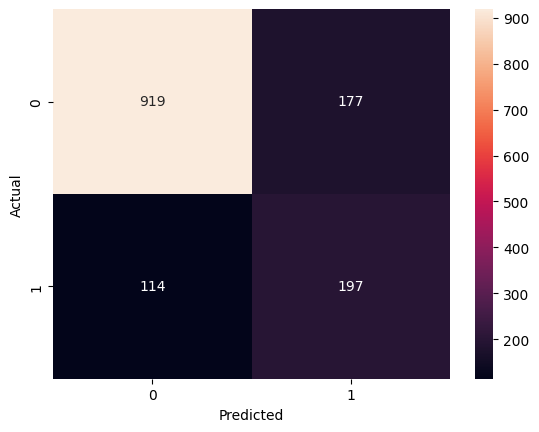

In [71]:
sn.heatmap(cm,annot=True,fmt="d")
pl.xlabel("Predicted")
pl.ylabel("Actual")